### 1. Importing Required Packages
#### These packages provide the essential tools for handling, cleaning, transforming, and analyzing the dataset.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### 2. Loading dataset
#### The file is xls so we use read_excel function


In [4]:
data = pd.read_excel('titanic.xls')

#### exploring data


In [6]:
#number of columns and lines
data.shape


(1309, 14)

In [7]:
#show rows names
data.columns
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 3. Deletion of non representative rows 
##### name ticket cabin and home.dest are not important 
##### boat column could give a direct information about survival passengers--> leaking the target 



In [9]:
data=data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)



In [10]:
data.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


### 2. deleting duplicates



In [12]:
data = data.drop_duplicates()


In [13]:
data.shape

(1114, 8)

### 3. Detecting outliers
#### only for numerical data 


In [15]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns 


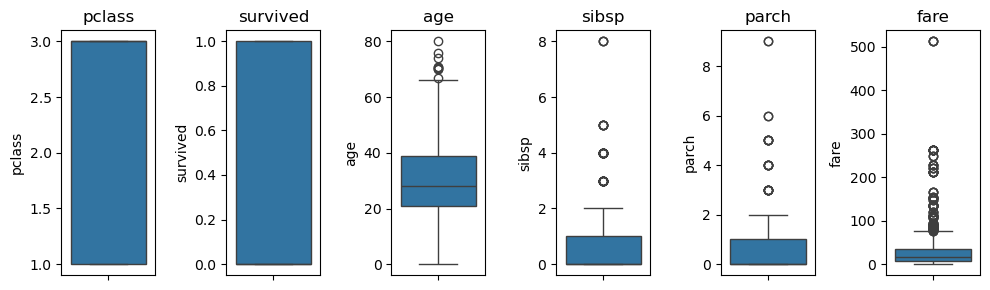

In [16]:
plt.figure(figsize=(10, 3))
numerical_features = ['age','sibsp', 'fare', 'parch']

# Loop through numerical features and plot boxplots
for i, feature in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [17]:
#counting befor imputation
data.describe().loc[["count"]]

,pclass,survived,age,sibsp,parch,fare
count,1114.0,1114.0,974.0,1114.0,1114.0,1113.0


#### importing transformers for imputation standardisation and PCA analysis


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 5. Imputation
#### using mean for numerical data and mode for categorical data


In [21]:
data[num_cols] = SimpleImputer(strategy="mean").fit_transform(data[num_cols])
data[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(data[cat_cols])


In [22]:
data.describe().loc[["count"]]

,pclass,survived,age,sibsp,parch,fare
count,1114.0,1114.0,1114.0,1114.0,1114.0,1114.0


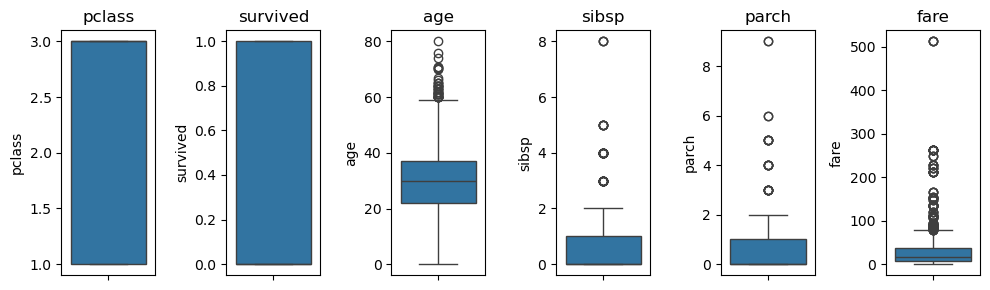

In [23]:
plt.figure(figsize=(10, 3))
numerical_features = ['age','sibsp', 'fare', 'parch']

# Loop through numerical features and plot boxplots
for i, feature in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


##### Plot histogram befor standarscaler transformation


In [25]:
print("Before scaling:")
print(data[numerical_features].describe())

Before scaling:
               age        sibsp         fare        parch
count  1114.000000  1114.000000  1114.000000  1114.000000
mean     30.089237     0.515260    36.672585     0.432675
std      13.767193     0.954603    55.030296     0.911862
min       0.166700     0.000000     0.000000     0.000000
25%      22.000000     0.000000     8.050000     0.000000
50%      30.089237     0.000000    16.100000     0.000000
75%      37.000000     1.000000    36.379439     1.000000
max      80.000000     8.000000   512.329200     9.000000


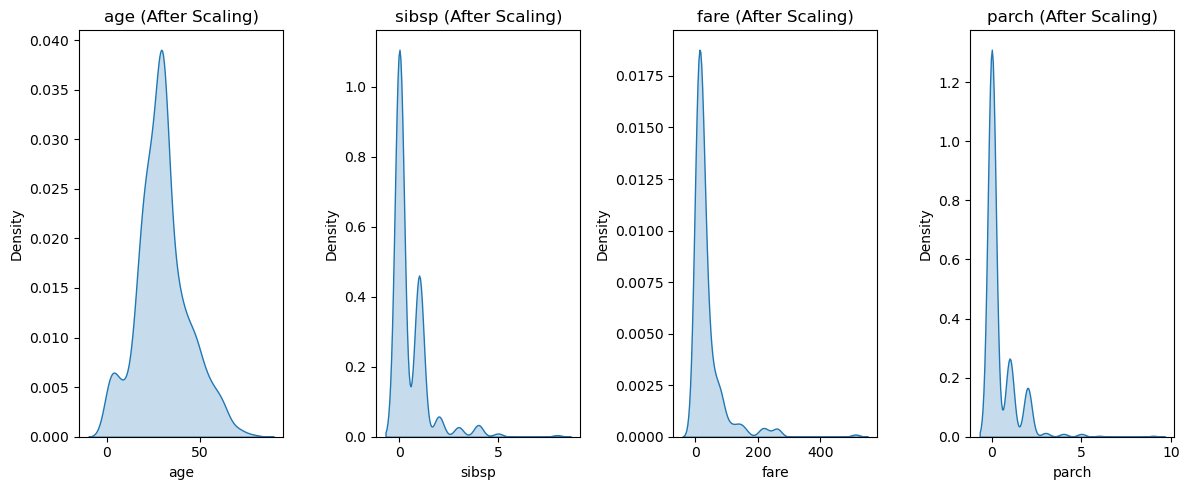

In [26]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.kdeplot(data[feature], fill=True)
    plt.title(f'{feature} (After Scaling)')
plt.tight_layout()
plt.show()

### 5. Normalisation
#### using standardscaler


In [28]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])  # only numerical



##### Plot histogram after standarscaler transformation


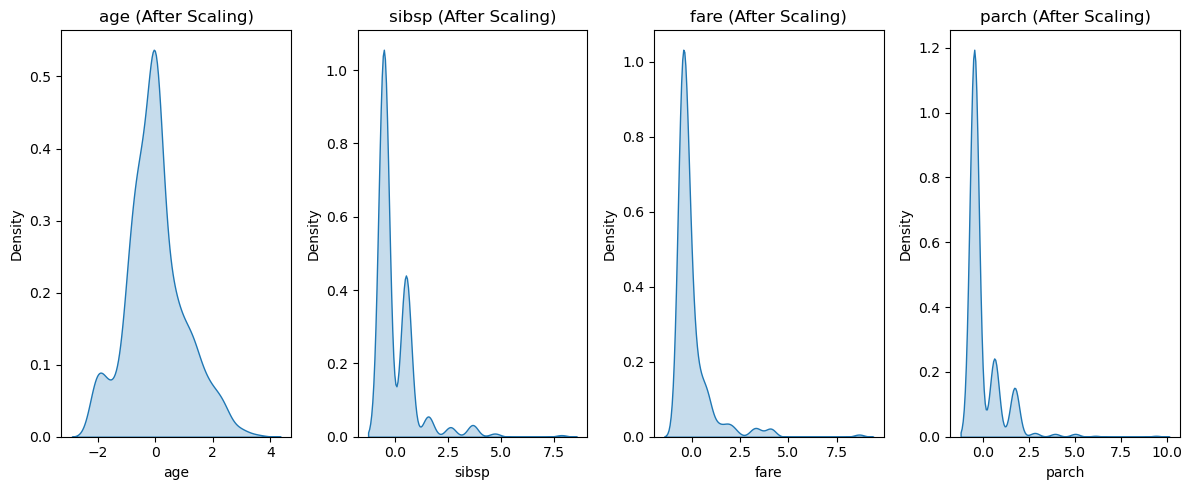

In [30]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.kdeplot(data[feature], fill=True)
    plt.title(f'{feature} (After Scaling)')
plt.tight_layout()
plt.show()

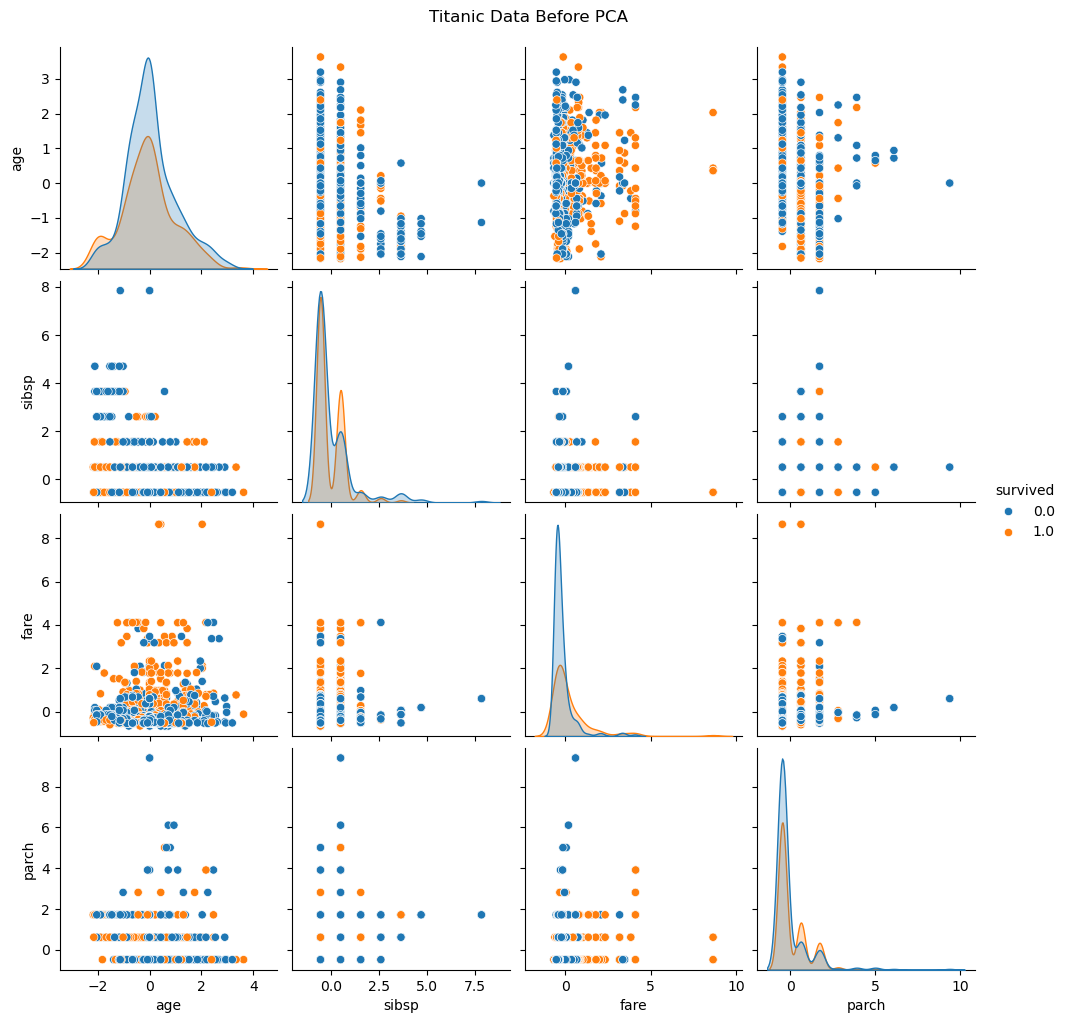

In [31]:
data_plot = data[numerical_features + ['survived']] 

sns.pairplot(data_plot, hue='survived', diag_kind='kde')
plt.suptitle("Titanic Data Before PCA", y=1.02)
plt.show()

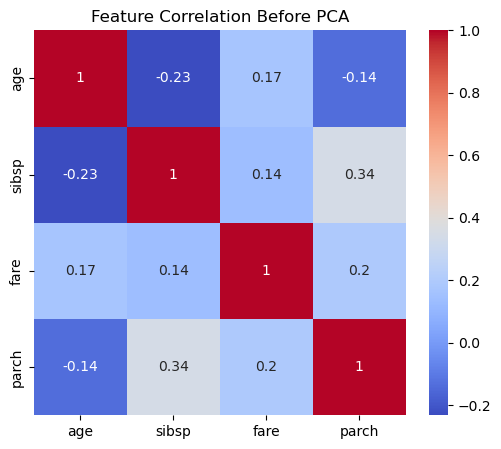

In [32]:
import numpy as np

plt.figure(figsize=(6,5))
sns.heatmap(data_plot[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Before PCA")
plt.show()

### 5. PCA
#### Principal Component Analysis


In [34]:
#  PCA 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[num_cols])

data["PC1"] = pca_data[:, 0]



In [35]:
#Resulting Dataset after PCA
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,PC1
0,1.0,1.0,female,-0.079154,-0.540006,-0.474709,3.175403,S,2.564780
1,1.0,1.0,male,-2.119941,0.508020,1.719590,2.088468,S,0.284329
2,1.0,0.0,female,-2.041219,0.508020,1.719590,2.088468,S,0.243574
3,1.0,0.0,male,-0.006485,0.508020,1.719590,2.088468,S,1.411958
4,1.0,0.0,female,-0.369830,0.508020,1.719590,2.088468,S,1.203318


In [36]:
data = data.drop(['parch', 'sibsp'], axis=1)

In [37]:
#Resulting Dataset after PCA
data.head()

,pclass,survived,sex,age,fare,embarked,PC1
0,1.0,1.0,female,-0.079154,3.175403,S,2.564780
1,1.0,1.0,male,-2.119941,2.088468,S,0.284329
2,1.0,0.0,female,-2.041219,2.088468,S,0.243574
3,1.0,0.0,male,-0.006485,2.088468,S,1.411958
4,1.0,0.0,female,-0.369830,2.088468,S,1.203318


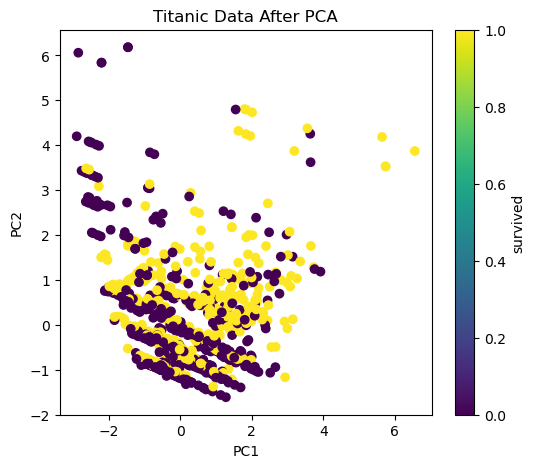

In [38]:
plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=data.loc[data_plot.index, 'survived'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='survived')
plt.title('Titanic Data After PCA')
plt.show()

In [82]:
data.to_csv("preprocessed_titanic.csv", index=False)